

# Maze Solution Algorithms

In [31]:
from PIL import Image
import numpy as np

def process_maze_to_binary(image_path, grid_size):
    """Convert the maze image into a binary matrix of the given grid size."""
    img = Image.open("0.png").convert('L')  # Convert to grayscale
    img_resized = img.resize((grid_size, grid_size), Image.Resampling.LANCZOS)  # Resize to grid size
    matrix = np.array(img_resized)
    threshold = 128  # Adjust threshold for binary conversion
    binary_maze = (matrix < threshold).astype(int)  # Convert to binary: 1 = wall, 0 = path
    return binary_maze

# Example usage
binary_maze = process_maze_to_binary("image.png", grid_size=21)

In [32]:
def print_aligned_maze(matrix):
    """Print the binary maze with proper alignment."""
    for row in matrix:
        print(" ".join(f"{cell}" for cell in row))

# Example usage
print_aligned_maze(binary_maze)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1
1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1
1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1
1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1
1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1
1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1
1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1
1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1
1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1
1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1
1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [33]:
from rich.console import Console

def print_binary_maze_rich(matrix):
    """Print the binary maze using the rich library for better alignment."""
    console = Console()
    for row in matrix:
        console.print(" ".join(str(cell) for cell in row))  # No need for "monospace" style

# Example usage
print_binary_maze_rich(binary_maze)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1

1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1

1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1

1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1

1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1

1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1

1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1

1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1

1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1

1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1

1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1

1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1

1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1

1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1

1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1

1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1

1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1

1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1

1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

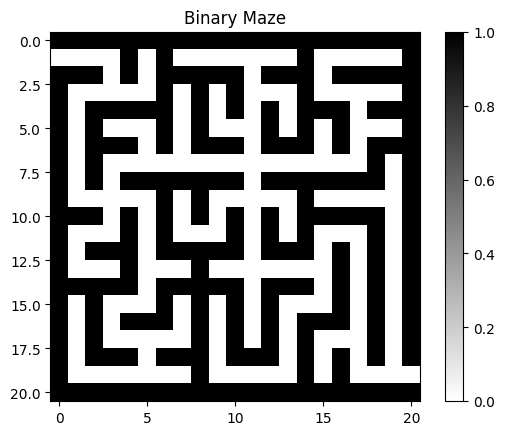

In [34]:
import matplotlib.pyplot as plt

def visualize_binary_maze(matrix):
    """Visualize the binary maze matrix."""
    plt.imshow(matrix, cmap="binary")  # Use binary colormap for clarity
    plt.title("Binary Maze")
    plt.colorbar()
    plt.show()

# Example usage
visualize_binary_maze(binary_maze)


Start: (11, 1), Goal: (9, 7)
BFS Path: [(11, 1), (11, 2), (11, 3), (10, 3), (9, 3), (8, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 11), (9, 11), (9, 10), (9, 9), (10, 9), (11, 9), (11, 8), (11, 7), (10, 7), (9, 7)]


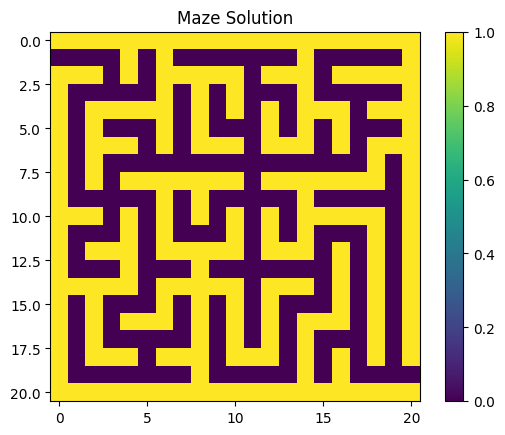

DFS Path: [(11, 1), (11, 2), (11, 3), (10, 3), (9, 3), (8, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 11), (9, 11), (9, 10), (9, 9), (10, 9), (11, 9), (11, 8), (11, 7), (10, 7), (9, 7)]


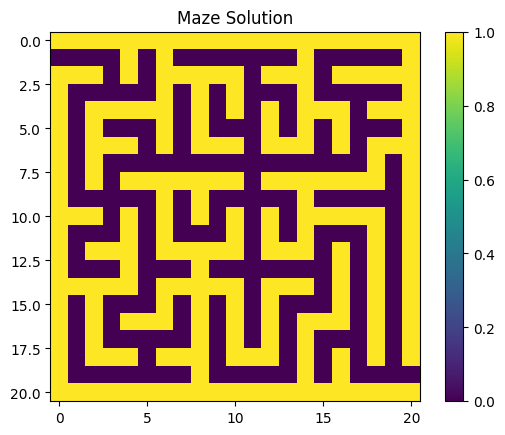

A* Path: [(11, 1), (11, 2), (11, 3), (10, 3), (9, 3), (8, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 11), (9, 11), (9, 10), (9, 9), (10, 9), (11, 9), (11, 8), (11, 7), (10, 7), (9, 7)]


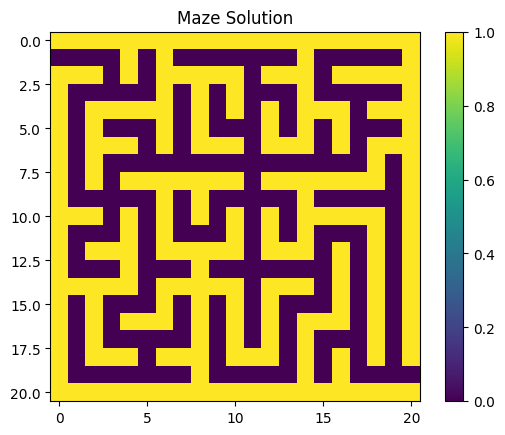

In [42]:
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Helper function to generate random start and goal
def get_random_start_goal(maze):
    """Generate random start and goal positions in the maze."""
    rows, cols = maze.shape
    while True:
        start = (random.randint(0, rows - 1), random.randint(0, cols - 1))
        goal = (random.randint(0, rows - 1), random.randint(0, cols - 1))
        # Ensure start and goal are valid paths (not walls) and not the same
        if maze[start] == 0 and maze[goal] == 0 and start != goal:
            return start, goal

# Process the maze and get random start/goal
binary_maze = process_maze_to_binary("0.png", grid_size=21)
start, goal = get_random_start_goal(binary_maze)

# Print start and goal positions for reference
print(f"Start: {start}, Goal: {goal}")

# BFS Implementation
def bfs(maze, start, goal):
    """Solve the maze using BFS."""
    rows, cols = maze.shape
    queue = deque([start])
    visited = set()
    visited.add(start)
    parent = {}

    while queue:
        current = queue.popleft()
        if current == goal:
            # Reconstruct path
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1]  # Reverse the path to start-to-goal

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited and maze[nx, ny] == 0:
                visited.add((nx, ny))
                queue.append((nx, ny))
                parent[(nx, ny)] = current

    return None  # No path found

# DFS Implementation
def dfs(maze, start, goal):
    """Solve the maze using DFS."""
    rows, cols = maze.shape
    stack = [start]
    visited = set()
    visited.add(start)
    parent = {}

    while stack:
        current = stack.pop()
        if current == goal:
            # Reconstruct path
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1]  # Reverse the path to start-to-goal

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited and maze[nx, ny] == 0:
                visited.add((nx, ny))
                stack.append((nx, ny))
                parent[(nx, ny)] = current

    return None  # No path found

# A* Implementation
import heapq

def manhattan_distance(a, b):
    """Calculate the Manhattan distance between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(maze, start, goal):
    """Solve the maze using A*."""
    rows, cols = maze.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    cost = {start: 0}
    parent = {}

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            # Reconstruct path
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0:
                new_cost = cost[current] + 1
                if (nx, ny) not in cost or new_cost < cost[(nx, ny)]:
                    cost[(nx, ny)] = new_cost
                    priority = new_cost + manhattan_distance((nx, ny), goal)
                    heapq.heappush(open_set, (priority, (nx, ny)))
                    parent[(nx, ny)] = current

    return None  # No path found

# Visualization Function
def visualize_solution(maze, path):
    """Visualize the solution path."""
    solution_maze = maze.copy()
    for x, y in path:
        solution_maze[x][y] = 0.5  # Mark the path
    plt.imshow(solution_maze, cmap="viridis")
    plt.title("Maze Solution")
    plt.colorbar()
    plt.show()

# Solve and Visualize for BFS
bfs_path = bfs(binary_maze, start, goal)
print("BFS Path:", bfs_path)
visualize_solution(binary_maze, bfs_path)

# Solve and Visualize for DFS
dfs_path = dfs(binary_maze, start, goal)
print("DFS Path:", dfs_path)
visualize_solution(binary_maze, dfs_path)

# Solve and Visualize for A*
a_star_path = a_star(binary_maze, start, goal)
print("A* Path:", a_star_path)
visualize_solution(binary_maze, a_star_path)


Start: (5, 10), Goal: (4, 1)
BFS Path: [(5, 10), (5, 11), (6, 11), (7, 11), (7, 10), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (8, 3), (9, 3), (9, 2), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1)]


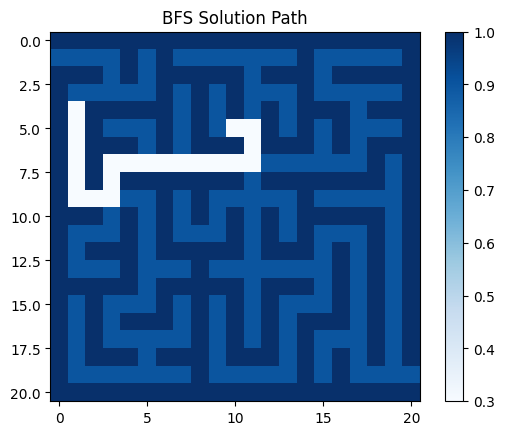

DFS Path: [(5, 10), (5, 11), (6, 11), (7, 11), (7, 10), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (8, 3), (9, 3), (9, 2), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1)]


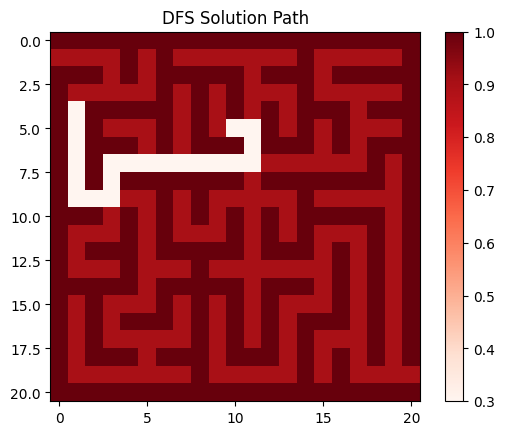

A* Path: [(5, 10), (5, 11), (6, 11), (7, 11), (7, 10), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (8, 3), (9, 3), (9, 2), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1)]


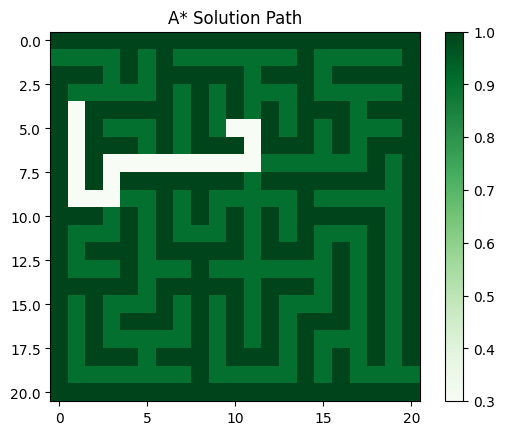

In [52]:
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import heapq

# Helper function to generate random start and goal
def get_random_start_goal(maze):
    """Generate random start and goal positions in the maze."""
    rows, cols = maze.shape
    while True:
        start = (random.randint(0, rows - 1), random.randint(0, cols - 1))
        goal = (random.randint(0, rows - 1), random.randint(0, cols - 1))
        # Ensure start and goal are valid paths (not walls) and not the same
        if maze[start] == 0 and maze[goal] == 0 and start != goal:
            return start, goal

# BFS Implementation
def bfs(maze, start, goal):
    """Solve the maze using BFS."""
    rows, cols = maze.shape
    queue = deque([start])
    visited = set()
    visited.add(start)
    parent = {}

    while queue:
        current = queue.popleft()
        if current == goal:
            # Reconstruct path
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1]  # Reverse the path to start-to-goal

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited and maze[nx, ny] == 0:
                visited.add((nx, ny))
                queue.append((nx, ny))
                parent[(nx, ny)] = current

    return None  # No path found

# DFS Implementation
def dfs(maze, start, goal):
    """Solve the maze using DFS."""
    rows, cols = maze.shape
    stack = [start]
    visited = set()
    visited.add(start)
    parent = {}

    while stack:
        current = stack.pop()
        if current == goal:
            # Reconstruct path
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1]  # Reverse the path to start-to-goal

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited and maze[nx, ny] == 0:
                visited.add((nx, ny))
                stack.append((nx, ny))
                parent[(nx, ny)] = current

    return None  # No path found

# A* Implementation
def manhattan_distance(a, b):
    """Calculate the Manhattan distance between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(maze, start, goal):
    """Solve the maze using A*."""
    rows, cols = maze.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    cost = {start: 0}
    parent = {}

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            # Reconstruct path
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0:
                new_cost = cost[current] + 1
                if (nx, ny) not in cost or new_cost < cost[(nx, ny)]:
                    cost[(nx, ny)] = new_cost
                    priority = new_cost + manhattan_distance((nx, ny), goal)
                    heapq.heappush(open_set, (priority, (nx, ny)))
                    parent[(nx, ny)] = current

    return None  # No path found

def visualize_solution_fixed(maze, path, algo_name, color):
    """Visualize the maze with black walls, white paths, and color-coded solution."""
    # Create a visualization array with walls and paths
    solution_display = np.zeros_like(maze, dtype=float)

    # Mark walls as black (1)
    solution_display[maze == 1] = 1.0  # Black walls

    # Mark paths as white (0)
    solution_display[maze == 0] = 0.9  # White paths

    # Mark the solution path with the specified color
    for x, y in path:
        solution_display[x][y] = 0.3  # Highlight solution path with intermediate value

    # Plot the maze
    plt.imshow(solution_display, cmap=color, interpolation="nearest")
    plt.title(f"{algo_name} Solution Path")
    plt.colorbar()
    plt.show()





# Process the maze and get random start/goal
binary_maze = process_maze_to_binary("0.png", grid_size=21)
start, goal = get_random_start_goal(binary_maze)
print(f"Start: {start}, Goal: {goal}")

# Visualize BFS Solution
bfs_path = bfs(binary_maze, start, goal)
print("BFS Path:", bfs_path)
visualize_solution_fixed(binary_maze, bfs_path, "BFS", "Blues")

# Visualize DFS Solution
dfs_path = dfs(binary_maze, start, goal)
print("DFS Path:", dfs_path)
visualize_solution_fixed(binary_maze, dfs_path, "DFS", "Reds")

# Visualize A* Solution
a_star_path = a_star(binary_maze, start, goal)
print("A* Path:", a_star_path)
visualize_solution_fixed(binary_maze, a_star_path, "A*", "Greens")


